In [387]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [388]:
x, y = make_classification(n_samples=2000, n_features=5, weights=[0.9], flip_y=0)

In [389]:
Counter(y)

Counter({0: 1801, 1: 199})

In [390]:
undersampler = RandomUnderSampler()

In [391]:
x_under, y_under = undersampler.fit_resample(x, y)

In [392]:
Counter(y_under)

Counter({0: 199, 1: 199})

In [393]:
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [394]:
Counter(y_under2)

Counter({0: 663, 1: 199})

#### 오버 샘플링
- 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법
- 데이터의 손실이 없기때문에 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [395]:
#랜덤 오버 샘플링
# 소수의 데이터를 단순 복제하여 다수의 데이터의 개수와 비율을 맞춰주는 방법
# 데이터를 단순하게 복제하기 때문에 분포가 변하지 않는다.
# 수가 증가 하기때문에 가중치
# 오버피팅의 위험성은 존재하지만 불균형 문제를 처리하지 않는거보다는 유효
from imblearn.over_sampling import RandomOverSampler

In [396]:
oversample = RandomOverSampler()

In [397]:
x_over, y_over = oversample.fit_resample(x, y)

In [398]:
Counter(y_over)

Counter({0: 1801, 1: 1801})

In [399]:
from imblearn.over_sampling import SMOTE

In [400]:
smote_sample = SMOTE()

In [401]:
x_sm, y_sm = smote_sample.fit_resample(x, y)

In [402]:
Counter(y_sm)

Counter({0: 1801, 1: 1801})

In [403]:
import matplotlib.pyplot as plt
import seaborn  as sns

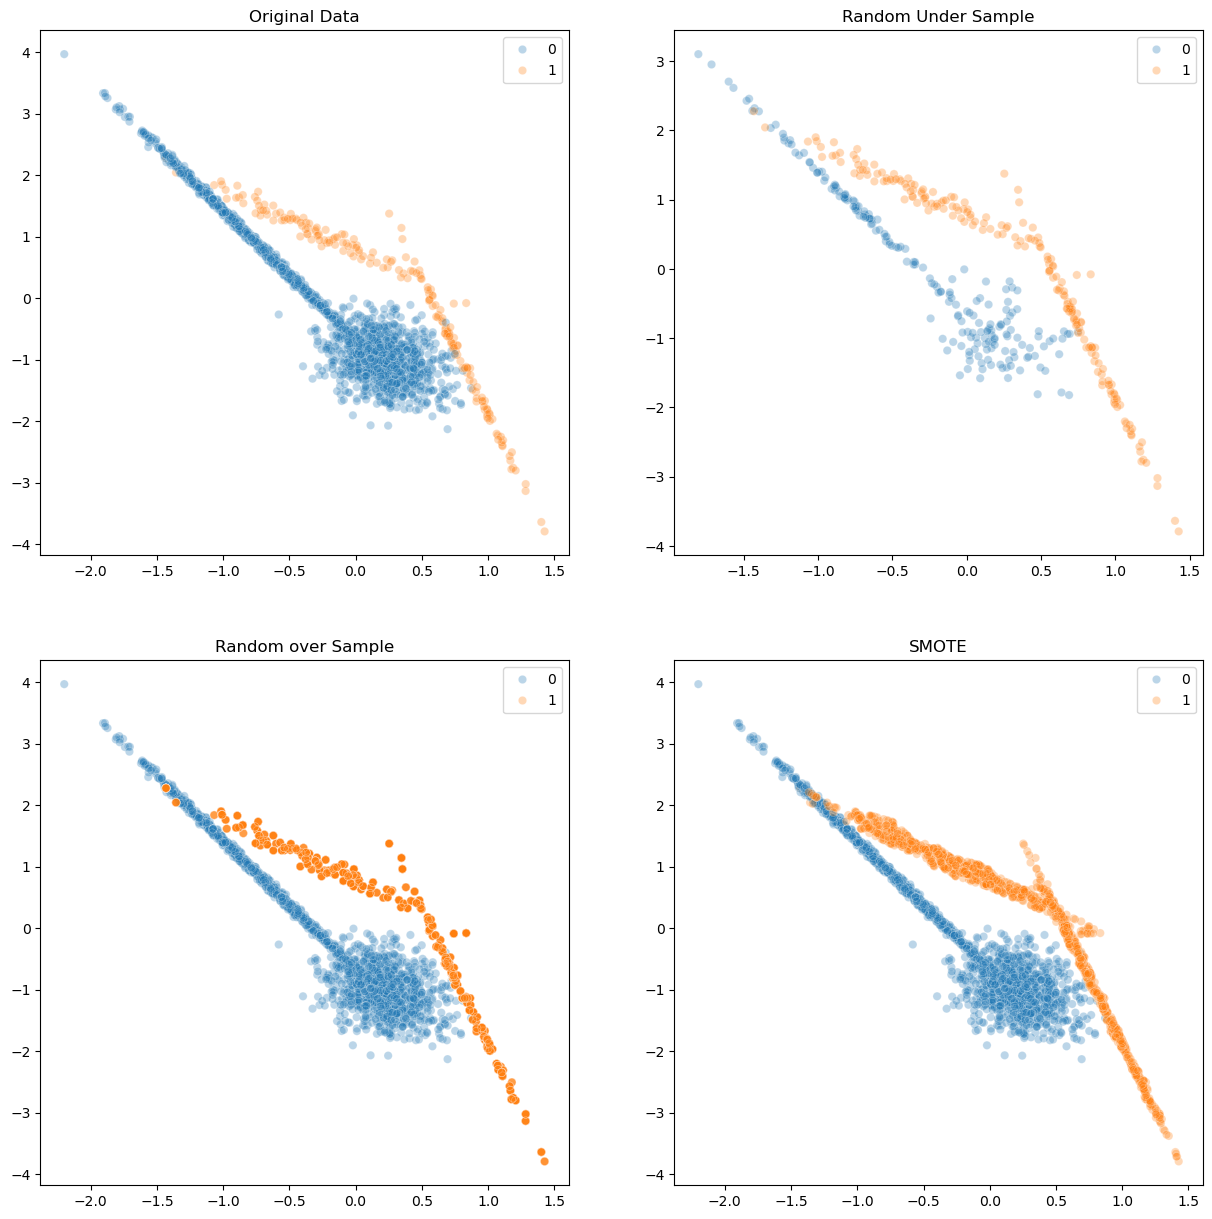

In [404]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.scatterplot(x = x[:, 1], y = x[:, 2], ax = axes[0][0], hue=y, alpha = 0.3)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue=y_under, alpha=0.3, ax = axes[0][1])
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue=y_over, alpha=0.3, ax = axes[1][0])
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue=y_sm, alpha=0.3, ax = axes[1][1])
axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random over Sample')
axes[1][1].set_title('SMOTE')

plt.show()